In [1]:
import pandas as pd
import numpy as np

from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

import easyocr
import keras_ocr

# Outline
1. Take a look at the data
2. Extract text from images
    - pytesseract
    - keras_ocr
    - easyocr
3. Compare results

In [2]:
imgs = glob('../TCG-RECOGNITION/data/*')
imgs

['../TCG-RECOGNITION/data\\1.jpg',
 '../TCG-RECOGNITION/data\\175.jpg',
 '../TCG-RECOGNITION/data\\1_.jpg',
 '../TCG-RECOGNITION/data\\2.jpg',
 '../TCG-RECOGNITION/data\\3.jpg',
 '../TCG-RECOGNITION/data\\6.jpg']

In [6]:
plt.imshow(plt.imread(imgs[3]))

NameError: name 'img' is not defined

## Pytesseract

In [ ]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd='C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
print(pytesseract.image_to_string(imgs[3], lang='fra'))

NIVEAU 1 GI ANCIEN PRE ASTM EREN ETES

Eh Arcanin 90 PV #

BEN
|

10 ces

KCAEZDDT, Vitesse JexiLefnes
Vous paÿez x de moins pobf faire battre
Arcanin en retraite pour chaque Énergie
qui lui est attachée 2
Coud' flammes Nous pouver vous

états hd abra/de cartes Energie dy atmchées.

RE
é 30

bn ne cs au rene
arte Hé dent vou vous êres
Eee D 0 de
Aspplémencies pour aqua ce.
Résistance (Coût de retraite
7 HET ©

A Faber / Nero Pro ALIA



## EasyOCR

In [ ]:


reader = easyocr.Reader(['en'], gpu = False)

Using CPU. Note: This module is much faster with a GPU.


In [ ]:
results = reader.readtext(imgs[3])
pd.DataFrame(results)

,0,1,2
0,"[[53, 15], [95, 15], [95, 29], [53, 29]]",NIYEAU,0.579949
1,"[[130, 18], [227, 18], [227, 37], [130, 37]]",Evolution de Canino,0.959834
2,"[[338, 24], [374, 24], [374, 32], [338, 32]]",akemon,0.924786
3,"[[124, 38], [224, 38], [224, 70], [124, 70]]",Arcanin,0.977581
4,"[[314, 42], [382, 42], [382, 72], [314, 72]]",90 PV,0.728937
5,"[[334, 70], [366, 70], [366, 78], [334, 78]]",Poke Tn,0.165297
6,"[[384, 72], [412, 72], [412, 78], [384, 78]]",Aarcol,0.001247
7,"[[77, 333], [159, 333], [159, 349], [77, 349]]",Poke-BODY,0.394859
8,"[[213, 329], [271, 329], [271, 347], [213, 347]]",Vitesse,0.997476
9,"[[275, 333], [343, 333], [343, 347], [275, 347]]",extreme,0.567216


## Keras_ocr

In [ ]:

pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\clara\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\clara\.keras-ocr\crnn_kurapan.h5


In [ ]:
results = pipeline.recognize([img[3]])
pd.set_option('display.max_rows', None)
pd.DataFrame(results[0], columns=['text', 'bbox'])

4/4 [==============================] - 4s 552ms/step


,text,bbox
0,niveau,"[[53.0, 16.0], [94.0, 16.0], [94.0, 28.0], [53..."
1,evolution,"[[132.06926, 19.783415], [177.30632, 21.197073..."
2,coninos,"[[193.19409, 20.47647], [232.57645, 23.505882]..."
3,phacel,"[[241.2434, 20.215008], [269.93713, 24.127789]..."
4,de,"[[179.0, 22.0], [191.0, 22.0], [191.0, 31.0], ..."
5,arcanin,"[[270.0, 22.0], [305.0, 22.0], [305.0, 32.0], ..."
6,pakesnon,"[[333.0, 23.0], [374.0, 23.0], [374.0, 32.0], ..."
7,de,"[[376.0, 23.0], [388.0, 23.0], [388.0, 32.0], ..."
8,base,"[[390.0, 24.0], [410.0, 24.0], [410.0, 33.0], ..."
9,sur,"[[306.0, 25.0], [322.0, 25.0], [322.0, 32.0], ..."


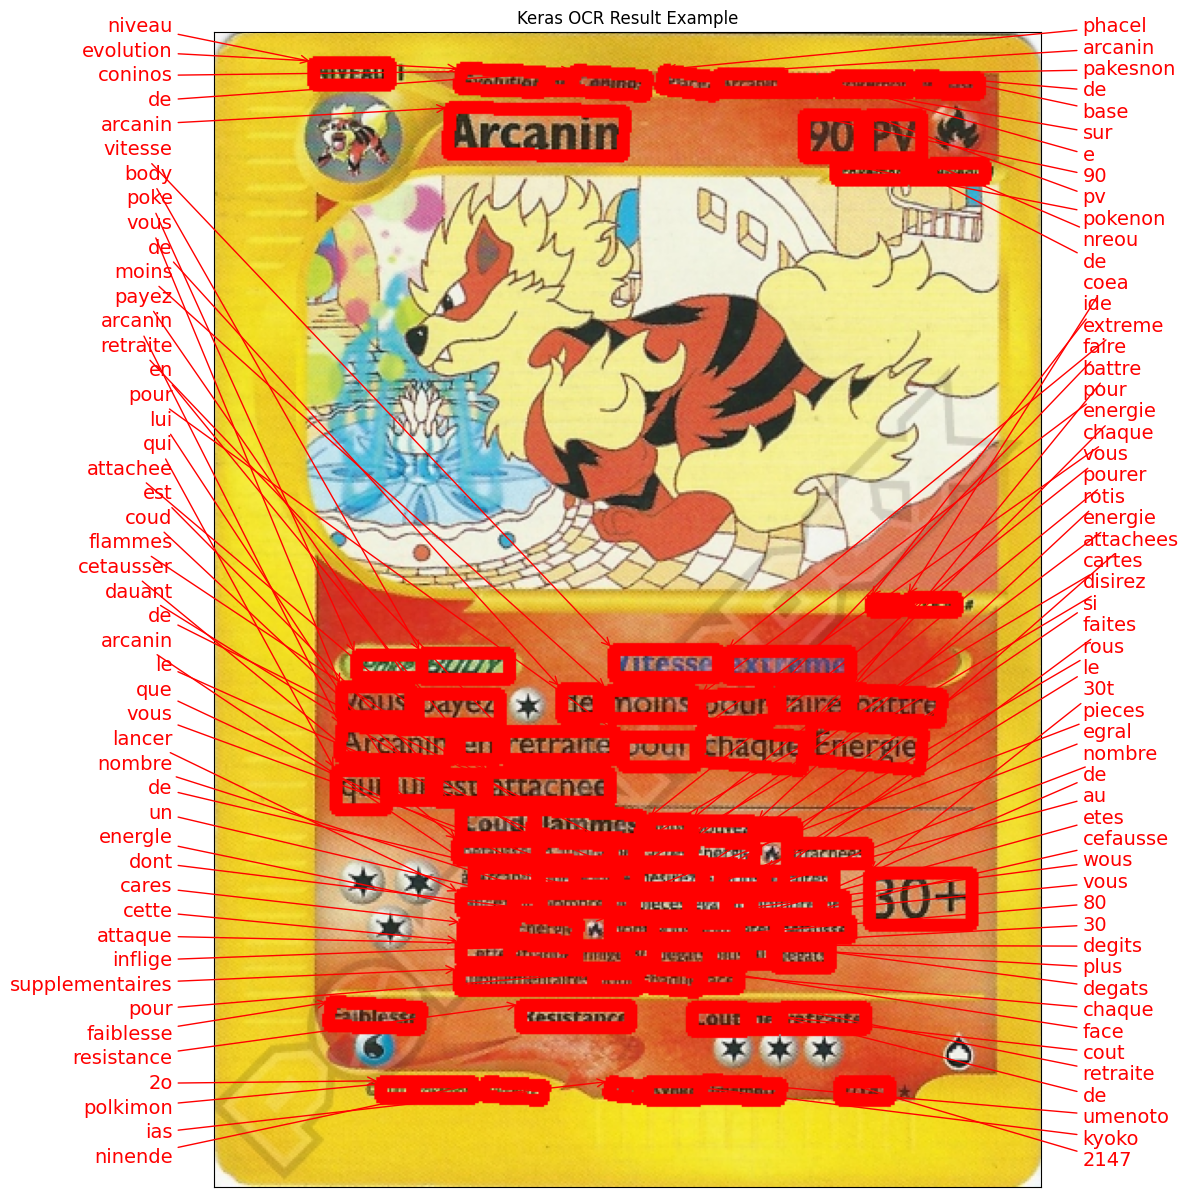

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
keras_ocr.tools.drawAnnotations(plt.imread(img[3]), results[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()

## Compare EasyOCR and Keras

In [3]:
# easyocr

reader = easyocr.Reader(['fr'], gpu = False)

dfs = []
for img in tqdm(imgs[:6]):
    result = reader.readtext(img)
    img_id = img.split('/')[-1].split('.')[0]
    img_df = pd.DataFrame(result, columns=['bbox','text','conf'])
    img_df['img_id'] = img_id
    dfs.append(img_df)
easyocr_df = pd.concat(dfs)


Using CPU. Note: This module is much faster with a GPU.


  0%|          | 0/6 [00:00<?, ?it/s]

In [4]:
# keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()

dfs = []
for img in tqdm(img_fns[:25]):
    results = pipeline.recognize([img])
    result = results[0]
    img_id = img.split('/')[-1].split('.')[0]
    img_df = pd.DataFrame(result, columns=['text', 'bbox'])
    img_df['img_id'] = img_id
    dfs.append(img_df)
kerasocr_df = pd.concat(dfs)


,bbox,text,conf,img_id
0,"[[19, 21], [67, 21], [67, 35], [19, 35]]",BASE,0.555370,data\1
1,"[[82, 22], [222, 22], [222, 54], [82, 54]]",Bulbizarre,0.954903,data\1
2,"[[329, 21], [391, 21], [391, 57], [329, 57]]",Pv70,0.857162,data\1
3,"[[122, 298], [144, 298], [144, 306], [122, 306]]",Quo,0.343625,data\1
4,"[[148, 298], [216, 298], [216, 306], [148, 306]]",Fokemon Grain :,0.123923,data\1
...,...,...,...,...
27,"[[45, 583], [107, 583], [107, 595], [45, 595]]",Ken Sucimod,0.305055,data\6
28,"[[127, 583], [369, 583], [369, 595], [127, 595]]","01595, 96 $6 Nhatendo Crratures; GayEFREAK019t...",0.016395,data\6
29,"[[383, 583], [409, 583], [409, 597], [383, 597]]",6/64,0.991707,data\6
30,"[[117.4187618062809, 34.18626652879327], [145....",base,0.927989,data\6
